# Old town code

## Raw midi

### Import

In [117]:
import pandas
import sklearn
from sklearn import model_selection
from sklearn import linear_model

### Load data

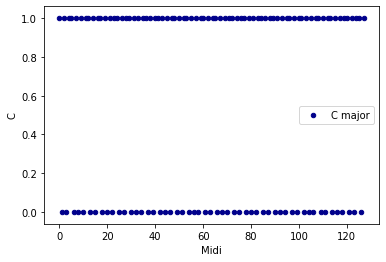

In [118]:
df = pandas.read_csv("notes.csv")
df.plot.scatter(x="Midi", y="C", label="C major", color="DarkBlue")

### Split into training and test sets

Training set size: 102
Test set size: 26


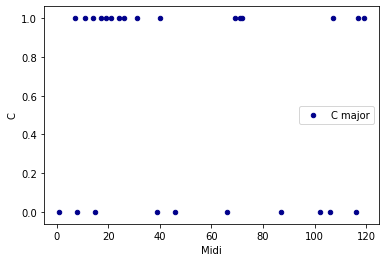

In [119]:
train, test = sklearn.model_selection.train_test_split(df, test_size=0.20, random_state=12)

print("Training set size: %i" % len(train))
print("Test set size: %i" % len(test))

test.plot.scatter(x="Midi", y="C", label="C major", color="DarkBlue")

### Linear Regression

In [120]:
x_train = train.filter(items=["Midi"])
y_train = train.filter(items=["C"])

linear = sklearn.linear_model.LinearRegression()
linear.fit(x_train, y_train)

x_test = test.filter(items=["Midi"])
y_test = test.filter(items=["C"])

print("Training score (bigger is worse): %f" % linear.score(x_train, y_train))
print("Testing score (bigger is worse): %f" % linear.score(x_test, y_test))

output = test.copy()
output["Linear prediction (C major)"] = linear.predict(x_test)
output.sample(n=5)

Training score (bigger is worse): 0.002671
Testing score (bigger is worse): -0.028214


,Midi,A,B,C,D,Linear prediction (C major)
40,40,1,1,1,1,0.559537
66,66,1,1,0,1,0.578116
15,15,0,1,0,0,0.541673
39,39,0,1,0,0,0.558822
21,21,1,0,1,1,0.545960


### Logistic Regression

In [121]:
logistic = sklearn.linear_model.LogisticRegression(solver = 'lbfgs')
logistic.fit(x_train, y_train.values.ravel())

y_train_predicted = logistic.predict(x_train)
print("Training accuracy: %i%%" % (100 * logistic.score(x_train, y_train)))

y_test_predicted = logistic.predict(x_test)
print("Testing accuracy: %i%%" % (100 * logistic.score(x_test, y_test)))

output = test.copy()
output["Logistic prediction (C major)"] = logistic.predict(x_test)
output.sample(n=5)



Training accuracy: 57%
Testing accuracy: 61%


,Midi,A,B,C,D,Logistic prediction (C major)
107,107,1,1,1,1,1
8,8,1,1,0,0,1
31,31,0,0,1,1,1
7,7,0,0,1,1,1
102,102,1,1,0,1,1


## Encoding octaves

### Encoding

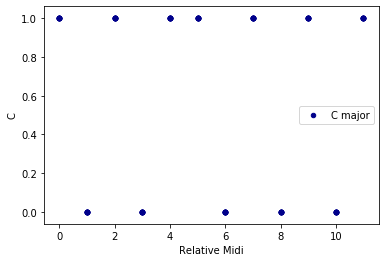

In [122]:
df["Relative Midi"] = df["Midi"] % 12
df["Octave"] = df["Midi"] // 12
df.plot.scatter(x="Relative Midi", y="C", label="C major", color="DarkBlue")
train, test = sklearn.model_selection.train_test_split(df, test_size=0.20, random_state=12)

### Linear regression

In [123]:
X_train = train.filter(items=["Octave", "Relative Midi"])
y_train = train.filter(items=["C"])

linear = sklearn.linear_model.LinearRegression()

linear.fit(X_train, y_train)

X_test = test.filter(items=["Octave", "Relative Midi"])
y_test = test.filter(items=["C"])

print("Training score (bigger is worse): %f" % linear.score(X_train, y_train))
print("Testing score (bigger is worse): %f" % linear.score(X_test, y_test))

output = test.copy()
output["Linear prediction (C major)"] = linear.predict(X_test)
output.sample(n=5)

Training score (bigger is worse): 0.006361
Testing score (bigger is worse): -0.046212


,Midi,A,B,C,D,Relative Midi,Octave,Linear prediction (C major)
119,119,1,1,1,1,11,9,0.561389
69,69,1,0,1,1,9,5,0.545642
1,1,1,1,0,1,1,0,0.571521
72,72,0,0,1,0,0,6,0.628277
7,7,0,0,1,1,7,0,0.521817


### Logistic regression

In [124]:
logistic = sklearn.linear_model.LogisticRegression(solver = 'lbfgs')
logistic.fit(X_train, y_train.values.ravel())

y_train_predicted = logistic.predict(X_train)
print("Training accuracy: %i%%" % (100 * logistic.score(X_train, y_train)))

y_test_predicted = logistic.predict(X_test)
print("Testing accuracy: %i%%" % (100 * logistic.score(X_test, y_test)))

output = test.copy()
output["Logistic prediction (C major)"] = logistic.predict(X_test)
output.sample(n=5)

Training accuracy: 57%
Testing accuracy: 57%


,Midi,A,B,C,D,Relative Midi,Octave,Logistic prediction (C major)
69,69,1,0,1,1,9,5,1
87,87,0,1,0,0,3,7,1
15,15,0,1,0,0,3,1,1
24,24,0,0,1,0,0,2,1
26,26,1,0,1,1,2,2,1
